### Media Company Case Study

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [162]:
inp = pd.read_csv('mediacompany (1).csv')
inp.drop('Unnamed: 7',axis=1,inplace=True)

In [163]:
inp.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [164]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [165]:
inp.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [166]:
inp.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

In [167]:
inp['Cricket_match_india'].value_counts()

0    72
1     8
Name: Cricket_match_india, dtype: int64

In [168]:
inp['Character_A'].value_counts()

0    50
1    30
Name: Character_A, dtype: int64

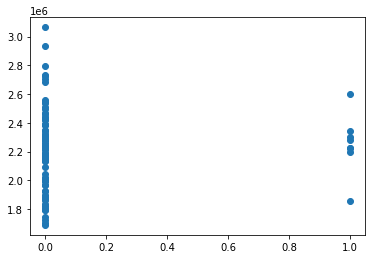

In [169]:
plt.scatter(y='Views_platform',x='Cricket_match_india',data=inp)

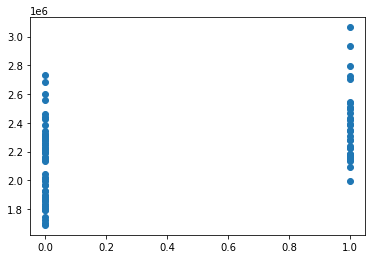

In [170]:
plt.scatter(y='Views_platform',x='Character_A',data=inp)

### Convert Date column into pandas datetime

In [171]:
inp['Date'] = pd.to_datetime(inp['Date'])

In [172]:
from datetime import date
d0 = date(2017, 2, 28)
d0_time = pd.Timestamp(d0)
d1 = inp['Date']
delta = d1 - d0_time
inp['Day'] = delta

In [173]:
# clean data
inp['Day'] = inp['Day'].astype('str')
inp['Day'] = inp['Day'].apply(lambda x: x[0:2])
inp['Day'] = inp['Day'].astype('int')

### EDA

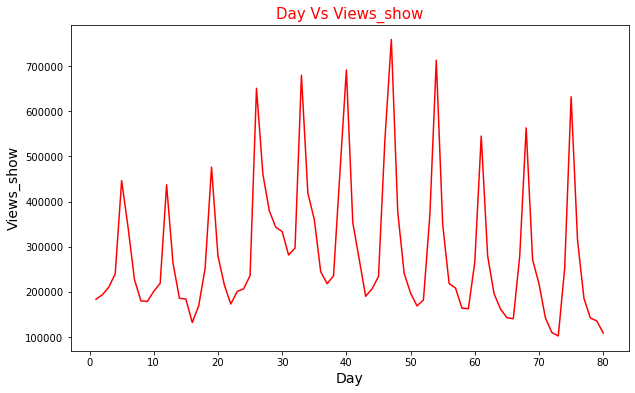

In [174]:
plt.figure(figsize=(10,6))
plt.plot(inp['Day'],inp['Views_show'],color='Red')
plt.title('Day Vs Views_show',fontdict={'fontsize':15,'color':'red'})
plt.xlabel('Day',fontdict={'fontsize':14})
plt.ylabel('Views_show',fontdict={'fontsize':14})
plt.show()

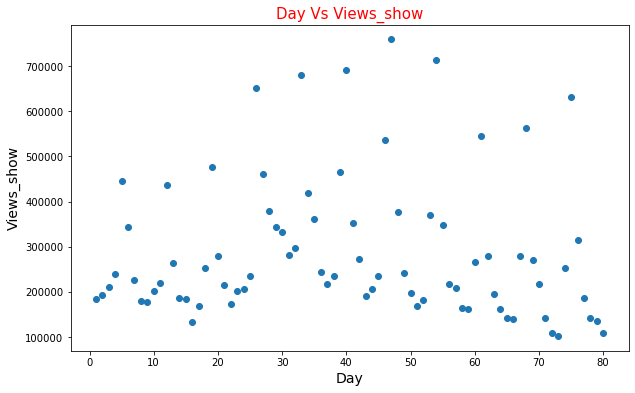

In [175]:
plt.figure(figsize=[10,6])
plt.scatter(inp['Day'],inp['Views_show'])
plt.title('Day Vs Views_show',fontdict={'fontsize':15,'color':'red'})
plt.xlabel('Day',fontdict={'fontsize':14})
plt.ylabel('Views_show',fontdict={'fontsize':14})
plt.show()

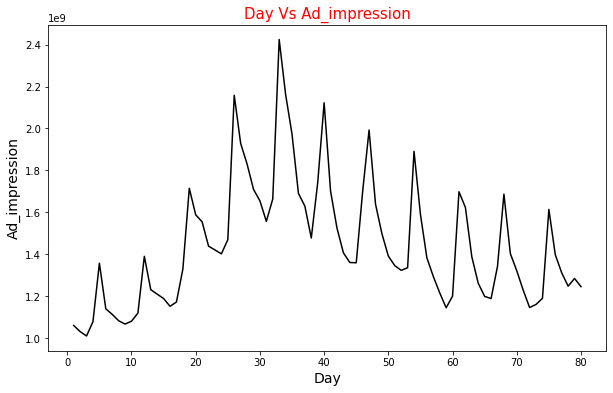

In [176]:
plt.figure(figsize=(10,6))
plt.plot(inp['Day'],inp['Ad_impression'],color='black')
plt.title('Day Vs Ad_impression',fontdict={'fontsize':15,'color':'red'})
plt.xlabel('Day',fontdict={'fontsize':14})
plt.ylabel('Ad_impression',fontdict={'fontsize':14})
plt.show()

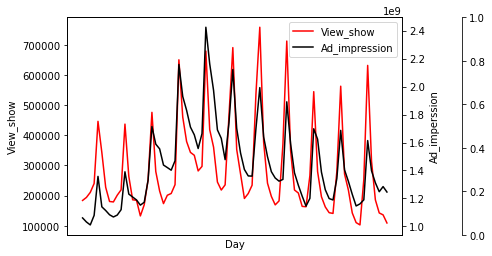

In [177]:
fig = plt.figure()
host = fig.add_subplot()

part1 = host.twinx()
part2 = host.twinx()

host.set_xlabel('Day')
host.set_ylabel('View_show')
part1.set_ylabel('Ad_imperssion')

p1, = host.plot(inp['Day'],inp['Views_show'], color='red',label='View_show')
p2, = part1.plot(inp['Day'],inp['Ad_impression'],color='black',label='Ad_impression')

lns = [p1 , p2]
plt.legend(handles=lns, loc='best')


part2.spines['right'].set_position(('outward', 60))      
part2.xaxis.set_ticks([])

plt.show()

In [178]:
# making into derived variable
# convert 0 into 7 which is sunday
inp['weekday'] = (inp['Day']+3)%7
inp['weekday'].replace(0,7,inplace=True)
inp.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


### Creating Our 1st Model 

In [179]:
X = inp[['Visitors','weekday']]
y = inp['Views_show']

In [180]:
# import the library for model building
import sklearn
from sklearn.linear_model import LinearRegression

#represent the linearRegression into lm
lm = LinearRegression()

# fit the model into training set
lm.fit(X,y)

LinearRegression()

In [181]:
import statsmodels.api as sm

X_train = sm.add_constant(X)
lr = sm.OLS(y,X_train).fit()
print('-----------------------------------------------------------------------------------')
print(lr.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr.summary())


-----------------------------------------------------------------------------------
const      -38615.112787
Visitors        0.278681
weekday    -35908.350137
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           8.01e-12
Time:                        17:12:39   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            n

In [182]:
# convert the weekends into 0 
def cond(i):
    if i%7==5 :
        return 1
    elif i%7==4:
        return 1
    else:
        return 0
    return i

In [183]:
inp['weekends'] = [cond(i) for i in inp['Day']]
inp.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekends
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


### Creating another model using visitors and weekends

In [184]:
X = inp[['Visitors','weekends']]
y = inp['Views_show']

X_train = sm.add_constant(X)
lr_2 = sm.OLS(y,X_train).fit()

print('-----------------------------------------------------------------------------------')
print(lr_2.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr_2.summary())


-----------------------------------------------------------------------------------
const       -88325.277230
Visitors         0.193362
weekends    180702.696033
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           2.51e-12
Time:                        17:12:40   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:          

### Running the 3rd model visitors,weekend,character_A

In [185]:
X = inp[['Visitors','weekends','Character_A']]
y = inp['Views_show']

X_train = sm.add_constant(X)
lr3 = sm.OLS(y,X_train).fit()

print('-----------------------------------------------------------------------------------')
print(lr3.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr3.summary())


-----------------------------------------------------------------------------------
const          -47221.913254
Visitors            0.148026
weekends       181214.948506
Character_A     95424.646323
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.53e-14
Time:                        17:12:40   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                              

In [186]:
## create a lag_variables which takes the above value in the columns

inp['Lag_Views'] = np.roll(inp['Views_show'],1)
inp.replace(108961,0,inplace=True)
inp.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekends,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


### Running the 4th model  visitors, weekend, character_A, Lag_views

In [187]:
X = inp[['Visitors', 'weekends', 'Character_A', 'Lag_Views']]
y = inp['Views_show']

X_train = sm.add_constant(X)
lr4 = sm.OLS(y,X_train).fit()

print('-----------------------------------------------------------------------------------')
print(lr4.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr4.summary())



-----------------------------------------------------------------------------------
const          -24005.317921
Visitors            0.058859
weekends       231277.606134
Character_A     56704.442288
Lag_Views           0.442485
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     52.66
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           4.78e-21
Time:                        17:12:40   Log-Likelihood:                -1016.6
No. Observations:                  80   AIC:                             2043.
Df Residuals:                      75   BIC:                             2055.
Df Model:                           4 

### Running the 5Th model weekends,Views_platform,Character_A

In [188]:
X = inp[['weekends','Views_platform','Character_A']]
y = inp['Views_show']

X_train = sm.add_constant(X)
lr5 = sm.OLS(y,X_train).fit()

print('-----------------------------------------------------------------------------------')
print(lr5.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr5.summary())



-----------------------------------------------------------------------------------
const            -111789.380936
weekends          181116.068470
Views_platform         0.145238
Character_A        73989.901152
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     36.96
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           7.72e-15
Time:                        17:12:40   Log-Likelihood:                -1034.1
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2086.
Df Model:                           3                  

### Running the 6th model weekends,Visitors,Character_A

In [189]:
X = inp[['weekends','Visitors','Character_A']]
y = inp['Views_show']

X_train = sm.add_constant(X)
lr6 = sm.OLS(y,X_train).fit()

print('-----------------------------------------------------------------------------------')
print(lr6.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr6.summary())

-----------------------------------------------------------------------------------
const          -41861.564831
weekends       184024.857824
Visitors            0.143076
Character_A     97865.587948
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     34.90
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           2.75e-14
Time:                        17:12:40   Log-Likelihood:                -1035.5
No. Observations:                  80   AIC:                             2079.
Df Residuals:                      76   BIC:                             2089.
Df Model:                           3                              

### Running the 7th model weekends,Visitors,Character_A,Ad_impression

In [190]:
X = inp[['weekends','Visitors','Character_A','Ad_impression']]
y = inp['Views_show']

X_train = sm.add_constant(X)
lr7 = sm.OLS(y,X_train).fit()

print('-----------------------------------------------------------------------------------')
print(lr7.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr7.summary())

-----------------------------------------------------------------------------------
const           -279322.692480
weekends         151136.527424
Visitors              0.008690
Character_A      -27602.909926
Ad_impression         0.000362
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     71.89
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           6.70e-25
Time:                        17:12:40   Log-Likelihood:                -1007.1
No. Observations:                  80   AIC:                             2024.
Df Residuals:                      75   BIC:                             2036.
Df Model:                   

### Running the 8th model weekends, Character_A, Ad_impression

In [191]:
X = inp[['weekends','Character_A','Ad_impression']]
y = inp['Views_show']

X_train = sm.add_constant(X)
lr8 = sm.OLS(y,X_train).fit()

print('-----------------------------------------------------------------------------------')
print(lr8.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr8.summary())


-----------------------------------------------------------------------------------
const           -268914.953458
weekends         152661.558712
Character_A      -27936.635052
Ad_impression         0.000365
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     97.07
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           6.34e-26
Time:                        17:12:41   Log-Likelihood:                -1007.1
No. Observations:                  80   AIC:                             2022.
Df Residuals:                      76   BIC:                             2032.
Df Model:                           3                      

In [192]:
## ad_impression should be in million we are seeing in the how many lakh views 

inp['Ad_impression_Million'] = inp['Ad_impression']/1000000

### Running the 9th model weekends, Character_A , Ad_impression_Million, Cricket_match_india

In [193]:
X = inp[['weekends','Character_A','Ad_impression_Million','Cricket_match_india']]
y = inp['Views_show']

X_train = sm.add_constant(X)
lr9 = sm.OLS(y,X_train).fit()

print('-----------------------------------------------------------------------------------')
print(lr9.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr9.summary())


-----------------------------------------------------------------------------------
const                   -263201.705230
weekends                 154817.694624
Character_A              -32086.940577
Ad_impression_Million       363.290944
Cricket_match_india      -28013.053638
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     73.03
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           4.21e-25
Time:                        17:12:41   Log-Likelihood:                -1006.6
No. Observations:                  80   AIC:                             2023.
Df Residuals:                      75   BIC:                       

 ### Running the 10th model  weekends, Character_A, Ad_impression_million

In [194]:
X = inp[['weekends','Character_A','Ad_impression_Million']]
y = inp['Views_show']

X_train = sm.add_constant(X)
lr10 = sm.OLS(y,X_train).fit()

print('-----------------------------------------------------------------------------------')
print(lr10.params)
print('-----------------------------------------------------------------------------------\n\n')
print(lr10.summary())


-----------------------------------------------------------------------------------
const                   -268914.961122
weekends                 152661.557011
Character_A              -27936.634906
Ad_impression_Million       364.641858
dtype: float64
-----------------------------------------------------------------------------------


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     97.07
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           6.34e-26
Time:                        17:12:41   Log-Likelihood:                -1007.1
No. Observations:                  80   AIC:                             2022.
Df Residuals:                      76   BIC:                             2032.
Df Model:                  

In [195]:
from sklearn.metrics import mean_squared_error,r2_score

y_train_pred = lr10.predict(X_train)

mse = mean_squared_error(y,y_train_pred)
r2 = r2_score(y,y_train_pred)

print('Mean_Squared_Error:',mse)
print('R2_Score:',r2)

Mean_Squared_Error: 5037895697.816751
R2_Score: 0.7930281234371859


Text(0, 0.5, 'Views')

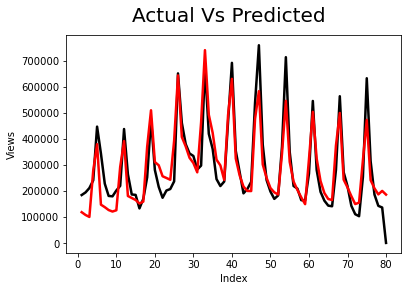

In [196]:
x = [i for i in range(1,81,1)]
fig = plt.figure()
p1, = plt.plot(x, inp['Views_show'],color='black',linewidth=2.5)
p1, = plt.plot(x,y_train_pred,color='red',linewidth=2.5)
fig.suptitle('Actual Vs Predicted',fontsize=20)
plt.xlabel('Index',fontdict={'fontsize':10})
plt.ylabel('Views',fontdict={'fontsize':10})

### Error Terms (actual - Pred values)

Text(0, 0.5, 'y - y_train_pred')

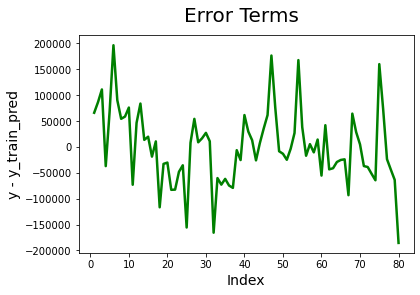

In [197]:
error = inp['Views_show'] - y_train_pred

x = [ i for i in range(1,81,1)]
p1,= plt.plot(x,error,color='green',linewidth=2.5)
plt.suptitle('Error Terms',fontsize=20)
plt.xlabel('Index',fontsize=14)
plt.ylabel('y - y_train_pred',fontsize=14)